In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

# Data cleaning

In [3]:
df = pd.read_csv("/Users/eva/Documents/Study/Y1S2/DMT/assignment2/chunk_2.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,66796,2013-02-19 19:35:53,5,219,NaN,NaN,219,138963,2,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,66797,2012-12-20 22:04:16,5,219,NaN,NaN,219,4480,0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,66797,2012-12-20 22:04:16,5,219,NaN,NaN,219,5023,3,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,66797,2012-12-20 22:04:16,5,219,NaN,NaN,219,5600,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
4,66797,2012-12-20 22:04:16,5,219,NaN,NaN,219,22764,2,3.5,...,NaN,NaN,NaN,NaN,-1.0,0.0,4.0,0,NaN,0


In [5]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

## Wrong data

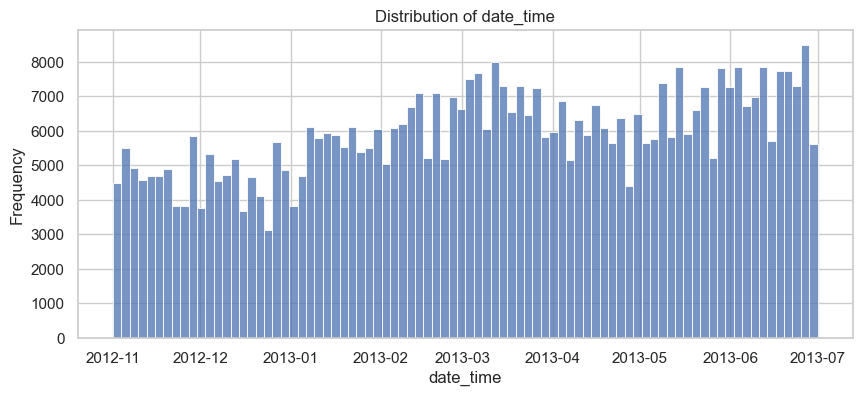

count                           500000
mean     2013-03-11 12:27:54.734737664
min                2012-11-01 00:08:29
25%                2013-01-15 17:47:55
50%                2013-03-13 18:55:17
75%                2013-05-10 12:13:09
max                2013-06-30 23:58:24
Name: date_time, dtype: object


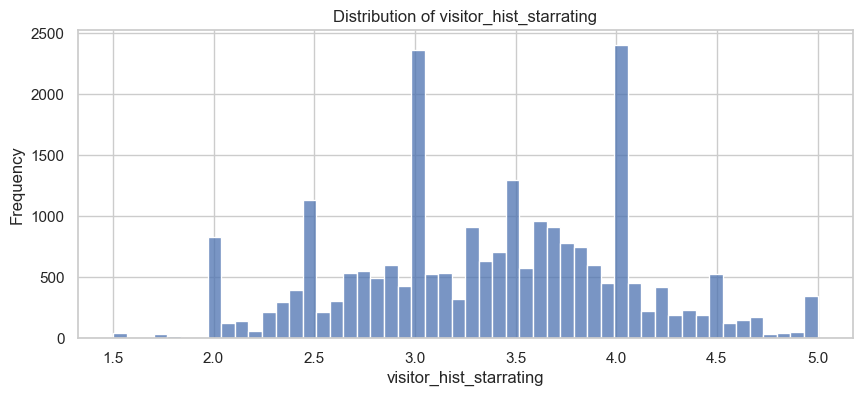

count    24200.000000
mean         3.377918
std          0.680915
min          1.500000
25%          2.930000
50%          3.430000
75%          3.920000
max          5.000000
Name: visitor_hist_starrating, dtype: float64


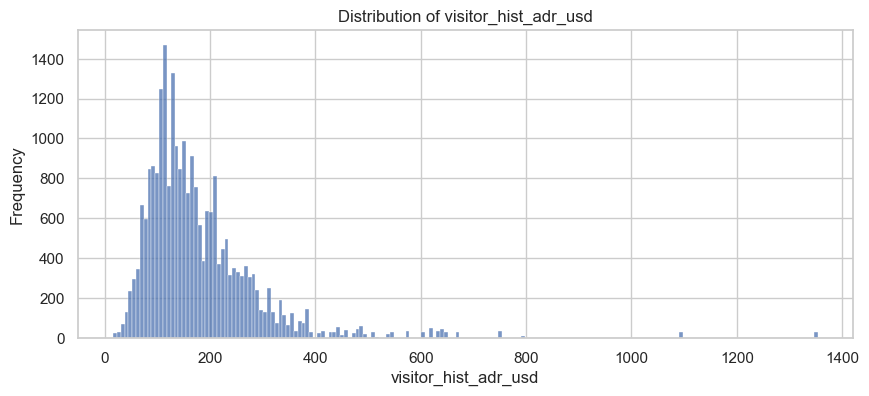

count    24224.000000
mean       178.816880
std        113.343902
min         15.960000
25%        110.300000
50%        151.950000
75%        216.270000
max       1353.090000
Name: visitor_hist_adr_usd, dtype: float64


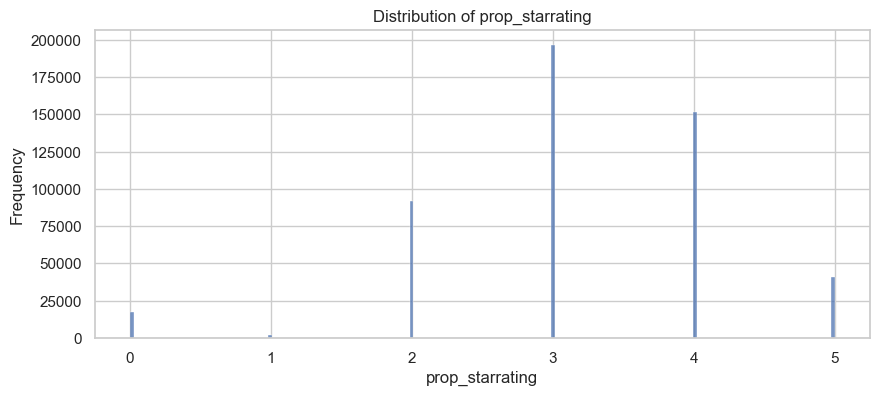

count    500000.000000
mean          3.173162
std           1.052513
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: prop_starrating, dtype: float64


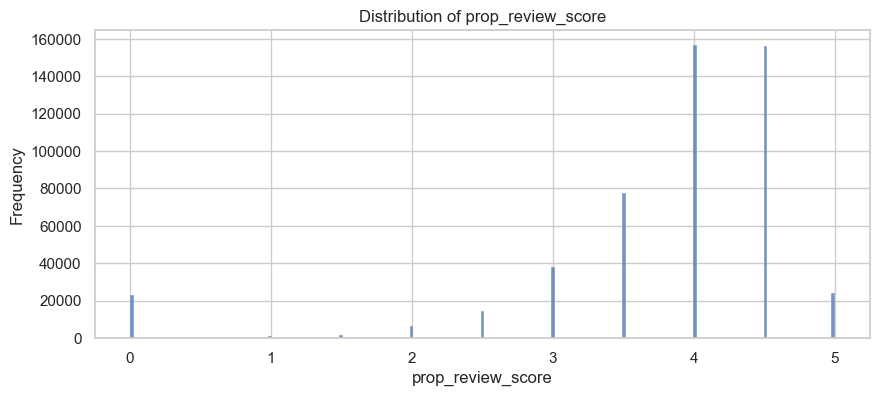

count    499261.000000
mean          3.780972
std           1.044149
min           0.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: prop_review_score, dtype: float64


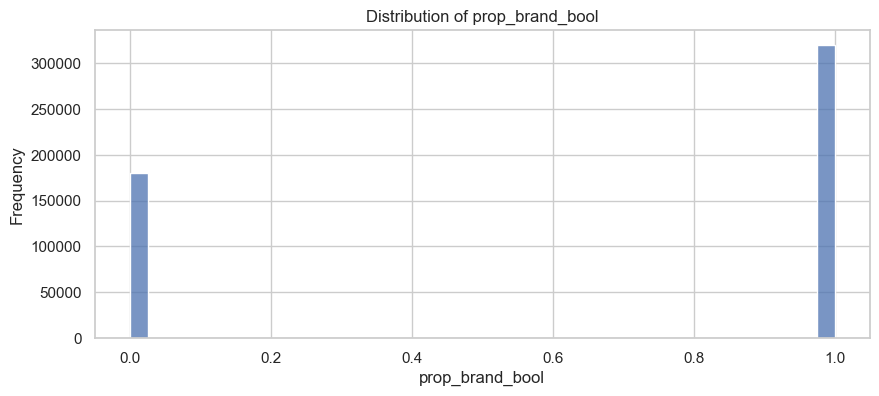

count    500000.000000
mean          0.640360
std           0.479895
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: prop_brand_bool, dtype: float64


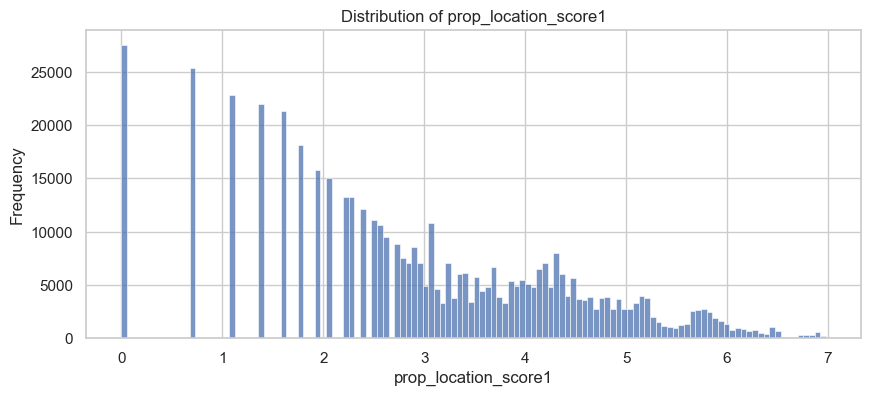

count    500000.000000
mean          2.866107
std           1.532661
min           0.000000
25%           1.790000
50%           2.770000
75%           4.040000
max           6.980000
Name: prop_location_score1, dtype: float64


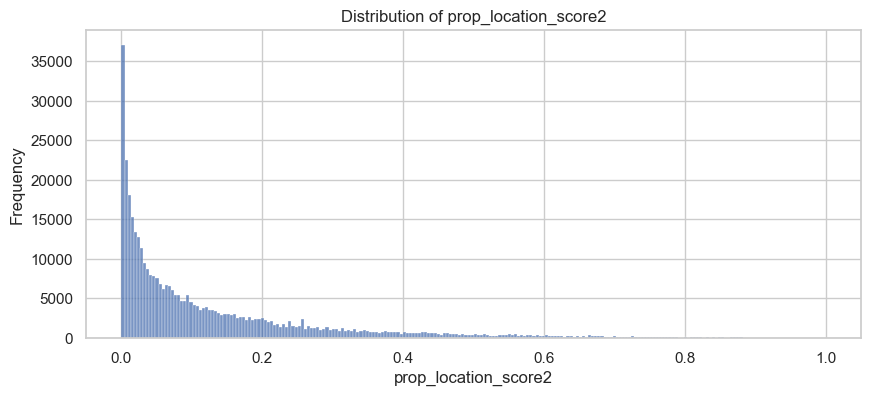

count    390135.000000
mean          0.129370
std           0.158564
min           0.000000
25%           0.018900
50%           0.068000
75%           0.179300
max           1.000000
Name: prop_location_score2, dtype: float64


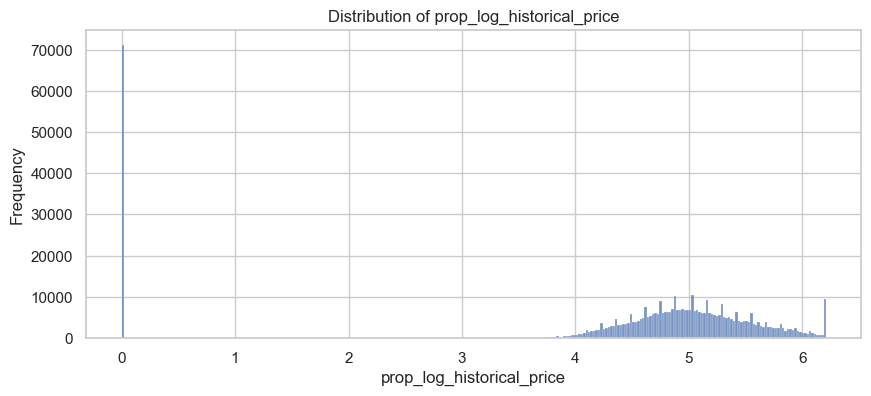

count    500000.000000
mean          4.325672
std           1.826961
min           0.000000
25%           4.450000
50%           4.910000
75%           5.310000
max           6.210000
Name: prop_log_historical_price, dtype: float64


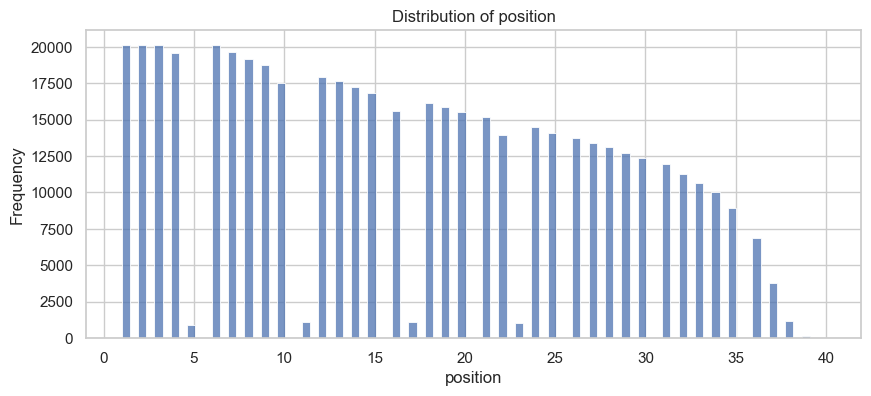

count    500000.000000
mean         16.867770
std          10.440969
min           1.000000
25%           8.000000
50%          16.000000
75%          26.000000
max          40.000000
Name: position, dtype: float64


KeyboardInterrupt: 

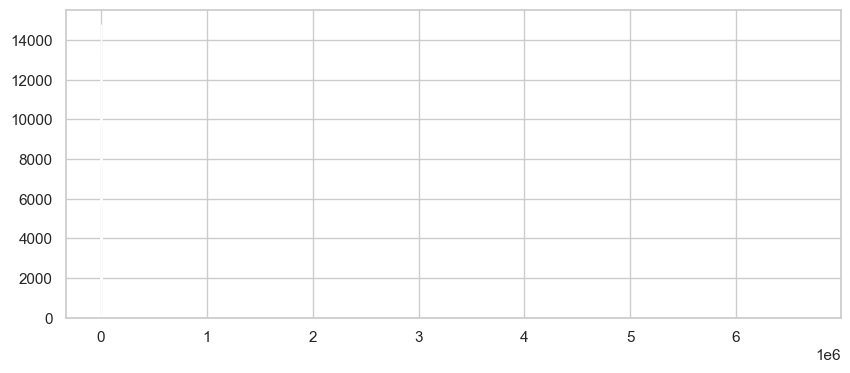

In [4]:
# Plot the disribution of all columns except _id variables
df_filtered = df.loc[:, ~df.columns.str.contains('_id')]

sns.set(style='whitegrid')
# make price_usd interger by rounding to the closest integer
df_filtered['price_usd'] = df_filtered['price_usd'].apply(lambda x: np.round(x))

# 为每一个列绘制直方图 but skip price
for column in df_filtered.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_filtered[column].dropna(), kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(df[column].describe())

In [5]:
# Check for all bool or flag type columns 0 or 1
bool_columns = [col for col in df.columns if 'bool' in col or 'flag' in col]
for column in bool_columns:
    print(df[column].value_counts())

prop_brand_bool
1    319004
0    180996
Name: count, dtype: int64
promotion_flag
0    392496
1    107504
Name: count, dtype: int64
srch_saturday_night_bool
1    250121
0    249879
Name: count, dtype: int64
random_bool
0    351845
1    148155
Name: count, dtype: int64
click_bool
0    477586
1     22414
Name: count, dtype: int64
booking_bool
0    486095
1     13905
Name: count, dtype: int64


In [9]:
# check visitor_hist_starrating prop_starrating prop_review_score all between 0-5
rating_columns = ['visitor_hist_starrating', 'prop_starrating', 'prop_review_score']
for column in rating_columns:
    if df[column].max() > 5 or df[column].min() < 0:
        print(f'{column} has values outside of the 0-5 range')
    else:
        print(f'{column} is within the 0-5 range')

visitor_hist_starrating is within the 0-5 range
prop_starrating is within the 0-5 range
prop_review_score is within the 0-5 range


In [15]:
# Check for negative values in all columns except _id variables and comp variables and srch_query_affinity_scor
columns_to_check = df.columns[
    ~df.columns.str.contains('_id') & 
    (df.columns != 'srch_query_affinity_score') & 
    ~df.columns.str.startswith('comp')
]
columns_flaws = [] # track columns containing negative values wrongly
# 对这些列进行检查
for column in columns_to_check:
    if df[column].dtype in ['int64', 'float64'] and (df[column] < 0).any():
        print(f"Column '{column}' contains values < 0.")
        columns_flaws.append(column)       
    else:
        print(f"All values in column '{column}' are > 0.")
print(columns_flaws)

All values in column 'date_time' are > 0.
All values in column 'visitor_hist_starrating' are > 0.
All values in column 'visitor_hist_adr_usd' are > 0.
All values in column 'prop_starrating' are > 0.
All values in column 'prop_review_score' are > 0.
All values in column 'prop_brand_bool' are > 0.
All values in column 'prop_location_score1' are > 0.
All values in column 'prop_location_score2' are > 0.
All values in column 'prop_log_historical_price' are > 0.
All values in column 'position' are > 0.
All values in column 'price_usd' are > 0.
All values in column 'promotion_flag' are > 0.
All values in column 'srch_length_of_stay' are > 0.
All values in column 'srch_booking_window' are > 0.
All values in column 'srch_adults_count' are > 0.
All values in column 'srch_children_count' are > 0.
All values in column 'srch_room_count' are > 0.
All values in column 'srch_saturday_night_bool' are > 0.
All values in column 'orig_destination_distance' are > 0.
All values in column 'random_bool' are >

In [18]:
# Check for all _rate variables whether only contains 0,-1,1
comp_rate_columns = df.columns[df.columns.str.endswith('_rate')]
for column in comp_rate_columns:
    print(df[column].value_counts())

comp1_rate
 1.0    6584
 0.0    4223
-1.0     848
Name: count, dtype: int64
comp2_rate
 0.0    162657
 1.0     25254
-1.0     16101
Name: count, dtype: int64
comp3_rate
 0.0    122276
 1.0     17663
-1.0     15129
Name: count, dtype: int64
comp4_rate
 0.0    20706
-1.0     5627
 1.0     4891
Name: count, dtype: int64
comp5_rate
 0.0    163857
 1.0     33216
-1.0     27817
Name: count, dtype: int64
comp6_rate
 0.0    16930
 1.0     5818
-1.0     2514
Name: count, dtype: int64
comp7_rate
 0.0    21048
 1.0     8519
-1.0     3461
Name: count, dtype: int64
comp8_rate
 0.0    148602
-1.0     26937
 1.0     15474
Name: count, dtype: int64


## Outliers

From the distribution plots above, personally speaking, I feel only price varaibles has this issue. But I am not sure whether we should adjust this.

## Missing Values

In [19]:
# Get the amount of missing values of each column
missing_values = df.isnull().sum()
missing_values

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
visitor_hist_starrating        474249
visitor_hist_adr_usd           474101
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                 700
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           109698
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
srch_query_affinity_score      467441
orig_destination_distance      160871
random_bool 

A hypothesis was that users do not like to book hotels with missing values, consequently
missing values were filled with worst case scenario. The missing values of competitor
descriptions were all set to zero.

### prop_review_score

count    499300.000000
mean          3.788202
std           1.038644
min           0.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: prop_review_score, dtype: float64


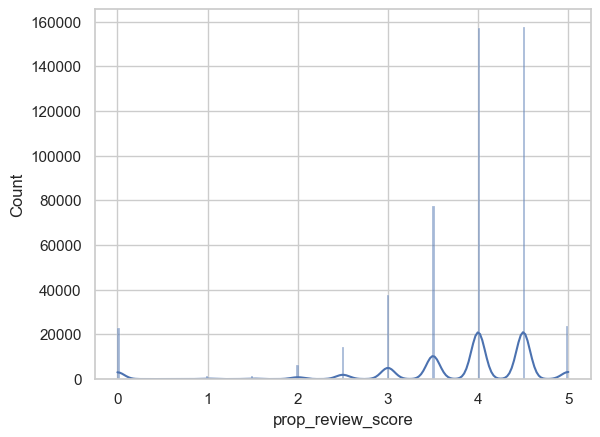

In [20]:
# check prop_review_score min,max,mean,median and plot its distribution
print(df['prop_review_score'].describe())
sns.histplot(df['prop_review_score'], kde=True)

df['prop_review_score'] = df['prop_review_score'].fillna(0)

### comp_

In [21]:
# for all comp variables, set the missing values to 0.
comp_cols = [f'comp{i}_rate' for i in range(1, 9)]
comp_cols += [f'comp{i}_inv' for i in range(1, 9)]
comp_cols += [f'comp{i}_rate_percent_diff' for i in range(1, 9)]
df[comp_cols] = df[comp_cols].fillna(0)




missing_values = df.isnull().sum()
missing_values

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
visitor_hist_starrating        474249
visitor_hist_adr_usd           474101
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                   0
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           109698
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
srch_query_affinity_score      467441
orig_destination_distance      160871
random_bool 

### prop_location_score2

count    390302.000000
mean          0.130305
std           0.159037
min           0.000000
25%           0.019300
50%           0.069100
75%           0.179900
max           1.000000
Name: prop_location_score2, dtype: float64


<Axes: xlabel='prop_location_score2', ylabel='Count'>

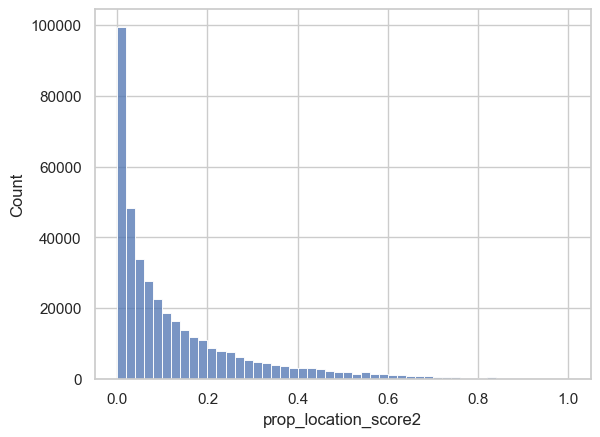

In [22]:
# check the prop_location_score2 variable min,max,mean,median and plot its distribution
print(df['prop_location_score2'].describe())
sns.histplot(df['prop_location_score2'], bins=50)

In [23]:
# fill NA in prop_location_score2 with 0
df['prop_location_score2'] = df['prop_location_score2'].fillna(0)

### srch_query_affinity_score

count    32559.000000
mean       -23.971953
std         15.336137
min       -143.331300
25%        -30.157050
50%        -20.322800
75%        -13.326600
max         -3.662500
Name: srch_query_affinity_score, dtype: float64


<Axes: xlabel='srch_query_affinity_score', ylabel='Count'>

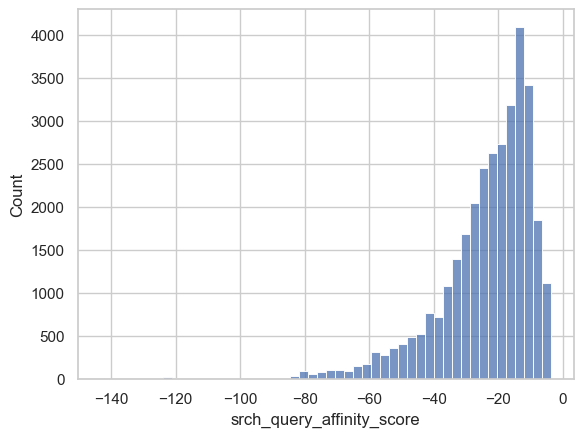

In [24]:
# check srch_query_affinity_score variable min,max,mean,median and plot its distribution
print(df['srch_query_affinity_score'].describe())
sns.histplot(df['srch_query_affinity_score'], bins=50)

In [25]:
# fill NA in srch_query_affinity_score with 10 times min
min_val = df['srch_query_affinity_score'].min()
df['srch_query_affinity_score'] = df['srch_query_affinity_score'].fillna(10*min_val) 

### orig_destination_distance

count    339129.000000
mean       1290.160803
std        2010.717806
min           0.010000
25%         137.020000
50%         379.490000
75%        1452.350000
max       11631.950000
Name: orig_destination_distance, dtype: float64


<Axes: xlabel='orig_destination_distance', ylabel='Count'>

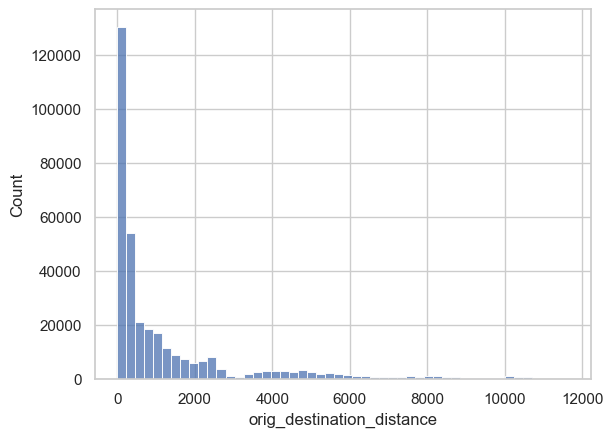

In [26]:
# check orig_destination_distance variable min,max,mean,median and plot its distribution
print(df['orig_destination_distance'].describe())
sns.histplot(df['orig_destination_distance'], bins=50)

In [27]:
# fill NA in orig_destination_distance with 10 times max
max_val = df['orig_destination_distance'].max()
df['orig_destination_distance'] = df['orig_destination_distance'].fillna(10*max_val) # 10 times max

In [28]:
missing_values = df.isnull().sum()
missing_values

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
visitor_hist_starrating        474249
visitor_hist_adr_usd           474101
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                   0
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2                0
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
srch_query_affinity_score           0
orig_destination_distance           0
random_bool 

### visitor_hist_starrating and visitor_hist_adr_usd

In [29]:
# for visitor_hist_starrating and visitor_hist_adr_usd, check if one is null the other is also null
both_nulls = df[df['visitor_hist_starrating'].isnull() & df['visitor_hist_adr_usd'].isnull()]

# calculate the number of nulls in each of these 2 columns
nulls_star = df['visitor_hist_starrating'].isnull().sum()
nulls_usd = df['visitor_hist_adr_usd'].isnull().sum()


percentage_matching_nulls = (both_nulls.shape[0] / df.shape[0]) * 100
percentage_matching_nulls_stars = (both_nulls.shape[0] / nulls_star) * 100
percentage_matching_nulls_usd = (both_nulls.shape[0] / nulls_usd) * 100

print(f'Percentage of matching nulls: {percentage_matching_nulls}')
print(f'Percentage of matching nulls in visitor_hist_starrating: {percentage_matching_nulls_stars}')
print(f'Percentage of matching nulls in visitor_hist_adr_usd: {percentage_matching_nulls_usd}')


Percentage of matching nulls: 94.8202
Percentage of matching nulls in visitor_hist_starrating: 99.96879276498211
Percentage of matching nulls in visitor_hist_adr_usd: 100.0


We assume that nulls in visitor_hist_starrating and visitor_hist_adr_usd should be identical. If not, we assume that this is a flaw. And we treat the non-null as null.

In [30]:
# Add a column 'bool_visitor_hist' to suggest whether either in visitor_hist_starrating or visitor_hist_adr_usd is null. 
# If both is not null, 'bool_visitor_hist' = 1. In other cases 'bool_visitor_hist' = 0.
df['bool_visitor_hist'] = 1
df.loc[df['visitor_hist_starrating'].isnull() | df['visitor_hist_adr_usd'].isnull(), 'bool_visitor_hist'] = 0


count    25751.000000
mean         3.398338
std          0.679699
min          1.670000
25%          2.980000
50%          3.500000
75%          3.940000
max          5.000000
Name: visitor_hist_starrating, dtype: float64


<Axes: xlabel='visitor_hist_starrating', ylabel='Count'>

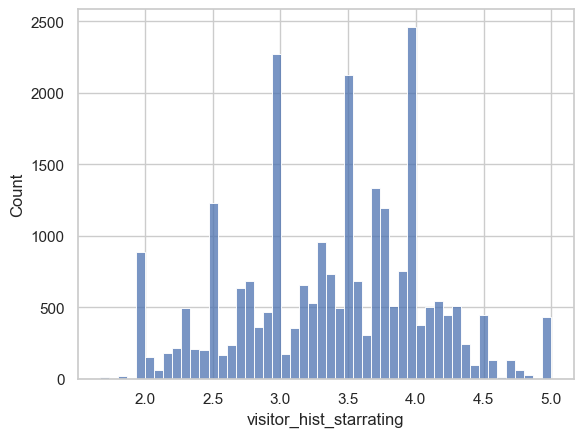

In [31]:
# Check 'visitor_hist_starrating' and 'visitor_hist_adr_usd' min,max,mean,median and plot their distribution
print(df['visitor_hist_starrating'].describe())
sns.histplot(df['visitor_hist_starrating'], bins=50)



count    25899.000000
mean       177.382155
std        102.236326
min         23.530000
25%        110.980000
50%        155.850000
75%        214.730000
max        928.760000
Name: visitor_hist_adr_usd, dtype: float64


<Axes: xlabel='visitor_hist_adr_usd', ylabel='Count'>

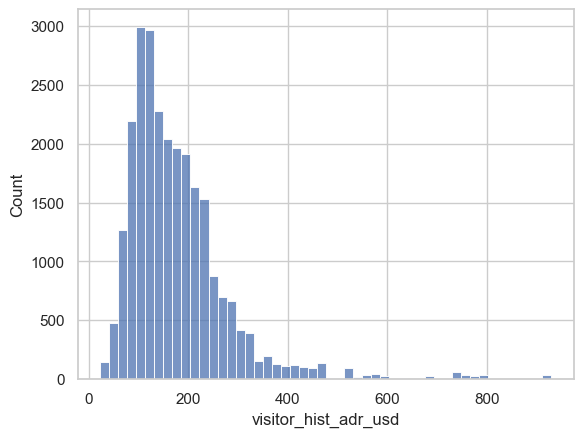

In [32]:
print(df['visitor_hist_adr_usd'].describe())
sns.histplot(df['visitor_hist_adr_usd'], bins=50)

Seems like visitor_hist_starrating and visitor_hist_adr_usd has no 0.  Now We make them both 0 if either one of them is null.

In [33]:
# If bool_visitor_hist is 0, make both visitor_hist_starrating and visitor_hist_adr_usd's values 0
df.loc[df['bool_visitor_hist'] == 0, 'visitor_hist_starrating'] = 0
df.loc[df['bool_visitor_hist'] == 0, 'visitor_hist_adr_usd'] = 0

In [34]:
missing_values = df.isnull().sum()
missing_values

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
visitor_hist_starrating             0
visitor_hist_adr_usd                0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                   0
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2                0
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
srch_query_affinity_score           0
orig_destination_distance           0
random_bool 

### gross_bookings_usd

Percentage of missing values in gross_bookings_usd: 97.219
count     13905.000000
mean        389.011188
std        1104.919464
min           0.000000
25%         124.120000
50%         219.790000
75%         431.320000
max      115309.140000
Name: gross_bookings_usd, dtype: float64


<Axes: xlabel='gross_bookings_usd', ylabel='Count'>

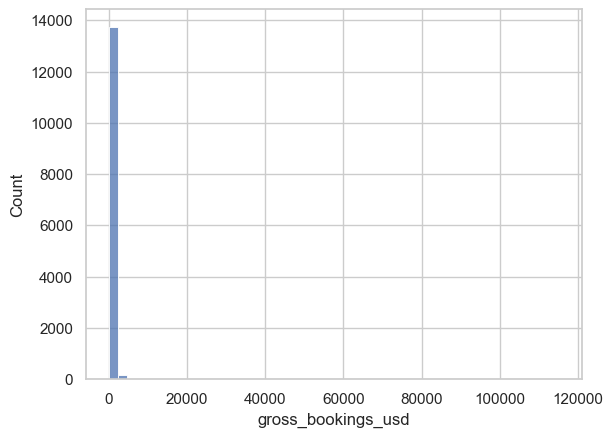

In [35]:
# check gross_bookings_usd missing value percentage and plot its distribution
missing_gross_bookings = df['gross_bookings_usd'].isnull().sum()
percentage_missing_gross_bookings = (missing_gross_bookings / df.shape[0]) * 100
print(f'Percentage of missing values in gross_bookings_usd: {percentage_missing_gross_bookings}')

print(df['gross_bookings_usd'].describe())
sns.histplot(df['gross_bookings_usd'], bins=50)

In [36]:
# if booking_bool is 1, check whether gross_bookings_usd is null
booking_bool = df[df['booking_bool'] == 1]
missing_gross_bookings_booking = booking_bool['gross_bookings_usd'].isnull().sum()
print(missing_gross_bookings_booking)

#if booking_bool is 0, check whether gross_bookings_usd is null
booking_bool = df[df['booking_bool'] == 0]
missing_gross_bookings_nonbooking = booking_bool['gross_bookings_usd'].isnull().sum()
percentage_gross_bookings_nonbooking = (missing_gross_bookings_nonbooking / booking_bool.shape[0]) * 100
print(percentage_gross_bookings_nonbooking)

# if booking_bool is 1, check whether gross_bookings_usd is 0
booking_bool = df[df['booking_bool'] == 1]
zero_gross_bookings_booking = booking_bool[booking_bool['gross_bookings_usd'] == 0].shape[0]
print(zero_gross_bookings_booking)

# if booking_bool is 0, check whether gross_bookings_usd is 0
booking_bool = df[df['booking_bool'] == 0]
zero_gross_bookings_nonbooking = booking_bool[booking_bool['gross_bookings_usd'] == 0].shape[0]
percentage_zero_gross_bookings_nonbooking = (zero_gross_bookings_nonbooking / booking_bool.shape[0]) * 100
print(percentage_zero_gross_bookings_nonbooking)


0
100.0
1
0.0


In [37]:
# make NA in gross_bookings_usd 0
df['gross_bookings_usd'] = df['gross_bookings_usd'].fillna(0)

In [38]:
df.to_csv('chunk_0_cleaned.csv', index=False)

# Summary of data cleaning
- wrong data:
  - Check all bool and flag data all 0 or 1. 
  - Check all comp{i}_rate all 0, -1, 1.
  - Check all non-negative variables all >=0.
  - Check all starrating or score variables all between 0 and 5.
- outliers:
  - 
- missing data:
  - A hypothesis was that users do not like to book hotels with missing values, consequently missing values were filled with worst case scenario. 
    - for 'prop_location_score2' and 'prop_review_score', set null 0.
    - for 'srch_query_affinity_score'(all negative values), set null 10*min.
    - for 'orig_destination_distance', set null 10*max.
  - The missing values of competitor descriptions were all set to zero.
  - For 'visitor_hist_adr_usd' and 'visitor_hist_starrating', their nulls are not identical. We add a column 'bool_visitor_hist' to suggest whether either in 'visitor_hist_starrating' or 'visitor_hist_adr_usd' is null. If 'bool_visitor_hist' is 0, make both 'visitor_hist_starrating' and 'visitor_hist_adr_usd''s values 0.
  - For 'gross_bookings_usd', in chunk_0 data, it seems that it's perfectly matched with 'booking_bool'. However one 0 in 'gross_bookings_usd' is identicied when 'booking_bool' is 1. This is a flaw. We make all NA in 'gross_bookings_usd' 0.